In [1]:
import tensorflow as tf

data_dir = tf.keras.utils.get_file(
    'flower_photos',
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)


In [6]:
datagen_kwargs = dict(rescale=1./255, validation_split=0.20)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)

IMAGE_SIZE = (224, 224) # Each image contains 224 by 224 by 3 pixels.
BATCH_SIZE = 32 # Each batch contains this sample count.

dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, interpolation="bilinear")

train_generator = train_datagen.flow_from_directory(
data_dir, subset="training", shuffle=True, **dataflow_kwargs)



Found 2939 images belonging to 5 classes.


In [9]:
labels_idx = (train_generator.class_indices)
idx_labels = dict((v,k) for k,v in labels_idx.items())
idx_labels

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [8]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32, 5)


In [10]:
valid_datagen = train_datagen
 
valid_generator = valid_datagen.flow_from_directory(
data_dir, subset="validation", shuffle=False, 
**dataflow_kwargs)


Found 731 images belonging to 5 classes.


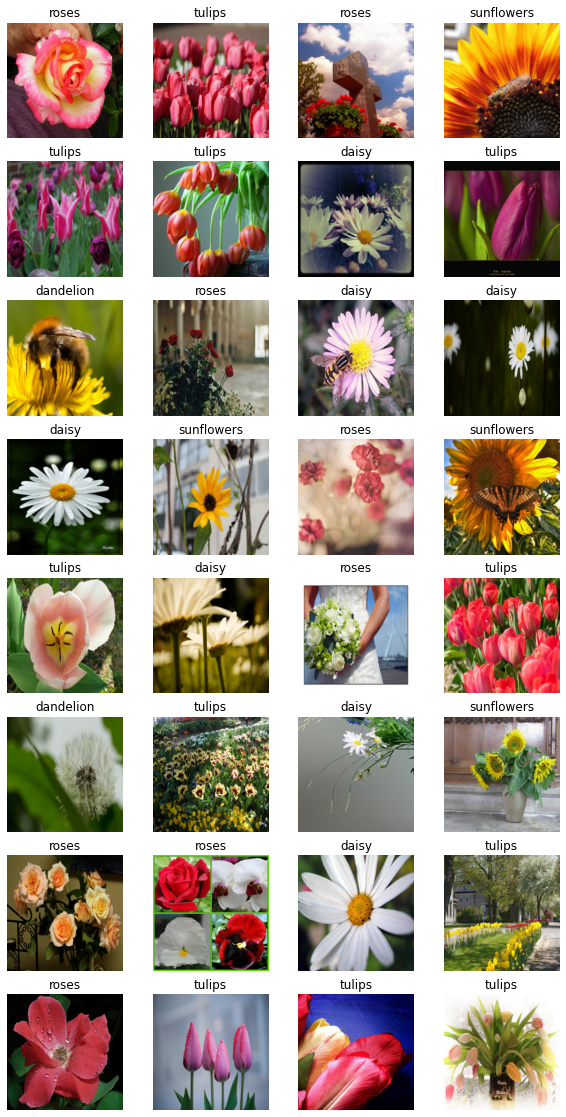

In [11]:
import matplotlib.pyplot as plt
import numpy as np

image_batch, label_batch = next(iter(train_generator))

fig, axes = plt.subplots(8, 4, figsize=(10, 20))
axes = axes.flatten()
for img, lbl, ax in zip(image_batch, label_batch, axes):
    ax.imshow(img)
    label_ = np.argmax(lbl)
    label = idx_labels[label_]
    ax.set_title(label)
    ax.axis('off')
plt.show()
